In [11]:
from snowpack_functions import make_map, mesh_gridify, unpack_netcdf_file_var,lat_lon_adjust,mask_latlon,historical_sum_swe
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import math 
%matplotlib inline 
## each figure: 1970-1999, 2010-2039, 2040-2069,2070-2099 (2 x 4, with first halfway between rows 1 and 2) 
## fileformat: pr_ensavg_rcp85_whites_2040-2069.nc

variables = ["pr","temp"]
# variables = ["pr"]
chunks = ["1970-1999","2010-2039","2040-2069","2070-2099","1970-1999","2010-2039","2040-2069","2070-2099"] 
scenarios = ["historical","rcp45","rcp45","rcp45","historical","rcp85","rcp85","rcp85"] 
basins = ["california","cascades","northernrockies","southernrockies","whites"] 

# scenario = "historical"
# basin = "whites"

saving figure to /raid9/gergel/agg_snowpack/climatology/plots/pr
saving figure to /raid9/gergel/agg_snowpack/climatology/plots/temp


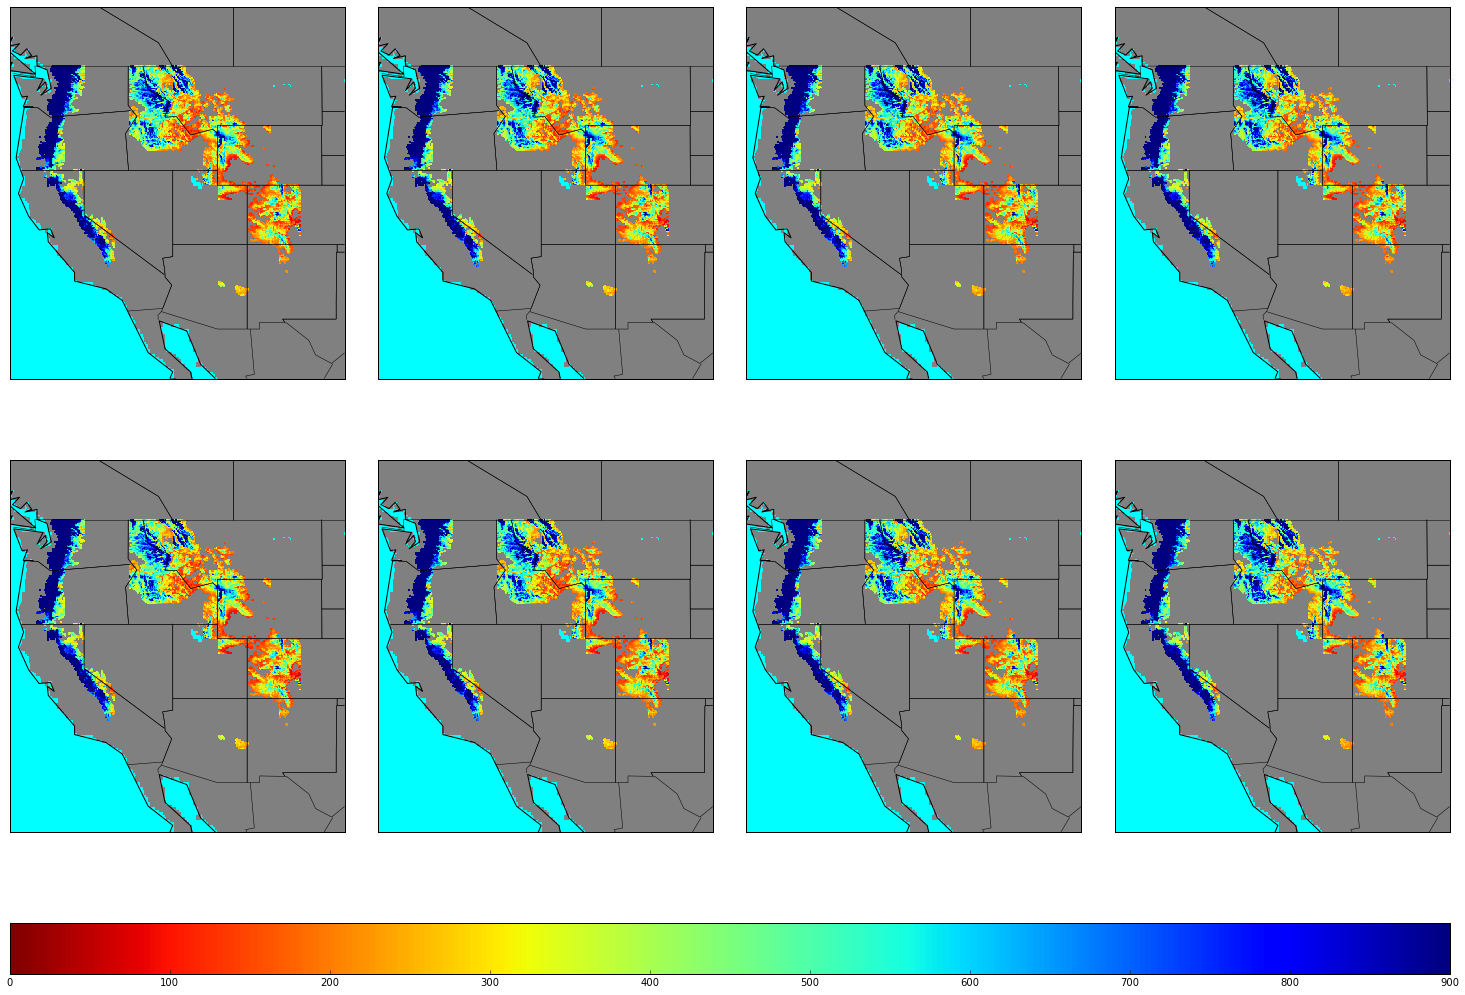

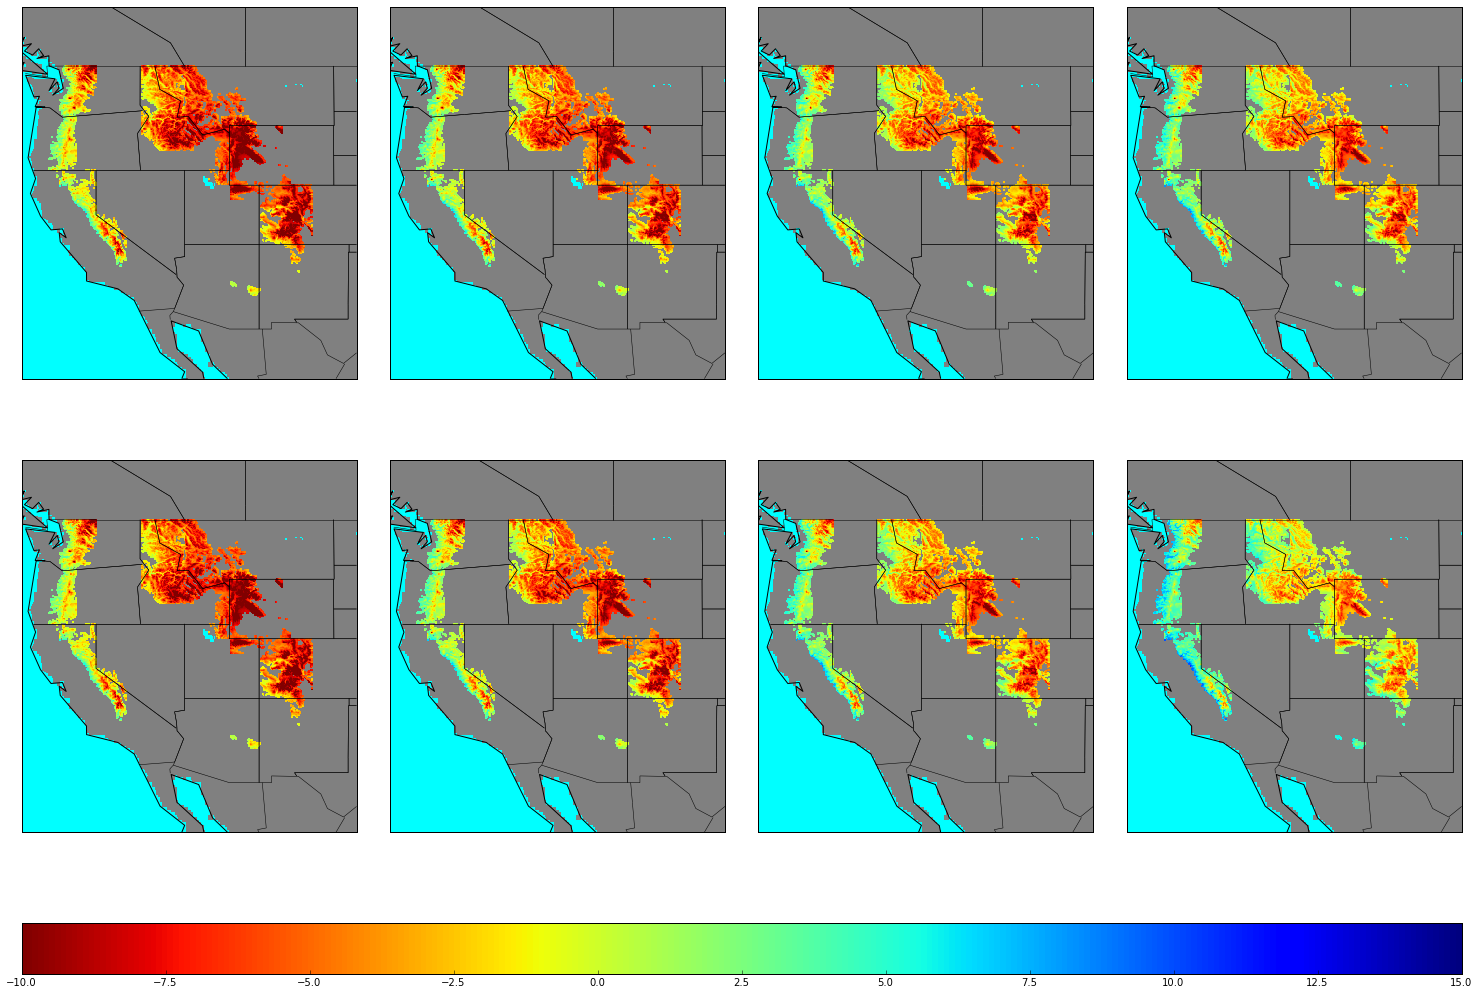

In [12]:
###################################################### MAKE FIGURE ###############################################################
## (10,7)
from pylab import *
lt = 20
rt = 14
# chunks=["1970-1999"]
for variable in variables: 
    fig = plt.figure(figsize=(lt,rt))
    for num in np.arange(len(chunks)):
        ax = fig.add_subplot(2,4,num+1)
        m = make_map()
        for basin in basins: 
            ## get data 
            direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
            filename = '%s_%s_%s_%s.npz' %(variable,basin,scenarios[num],chunks[num])
            data = np.load(os.path.join(direc,filename))
            lats_inc = data['lats']
            lons_inc = data['lons']
            var_series = data['var']
            lons_mesh,lats_mesh,data_mesh = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1)) 
            if (variable == "pr"):
                cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='jet_r',latlon=True,zorder=1,vmin=0,vmax=900)
            else: 
                cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='jet_r',latlon=True,zorder=1,vmin=-10,vmax=15)
    fig.subplots_adjust(left=0,right=1,top=1,bottom=0.1,hspace=0.00000001,wspace=0.1)
    cax = fig.add_axes([0.0, 0.0, 1.0, 0.05])
    colorbar(cax=cax,orientation='horizontal')
    ## save figure
    direc = '/raid9/gergel/agg_snowpack/climatology/plots'
    plotname = '%s' %variable 
    savepath = os.path.join(direc,plotname)
    print("saving figure to %s" %savepath)
    plt.savefig(savepath)

                        

In [13]:
direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("pr","california","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
lons_mesh,lats_mesh,pr_california = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))
direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("pr","cascades","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
lons_mesh,lats_mesh,pr_cascades = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))
direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("pr","northernrockies","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
lons_mesh,lats_mesh,pr_northernrockies = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))
direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("pr","southernrockies","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
lons_mesh,lats_mesh,pr_southernrockies = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))
direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("pr","whites","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
lons_mesh,lats_mesh,pr_whites = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))

direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("temp","california","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
lons_mesh,lats_mesh,temp_california = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))
filename = '%s_%s_%s_%s.npz' %("temp","cascades","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
lons_mesh,lats_mesh,temp_cascades = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))
direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("temp","northernrockies","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
lons_mesh,lats_mesh,temp_northernrockies = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))
direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("temp","southernrockies","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
lons_mesh,lats_mesh,temp_southernrockies = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))
direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("temp","whites","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
lons_mesh,lats_mesh,temp_whites = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))

saving figure to /raid9/gergel/agg_snowpack/climatology/plots/pr
saving figure to /raid9/gergel/agg_snowpack/climatology/plots/temp


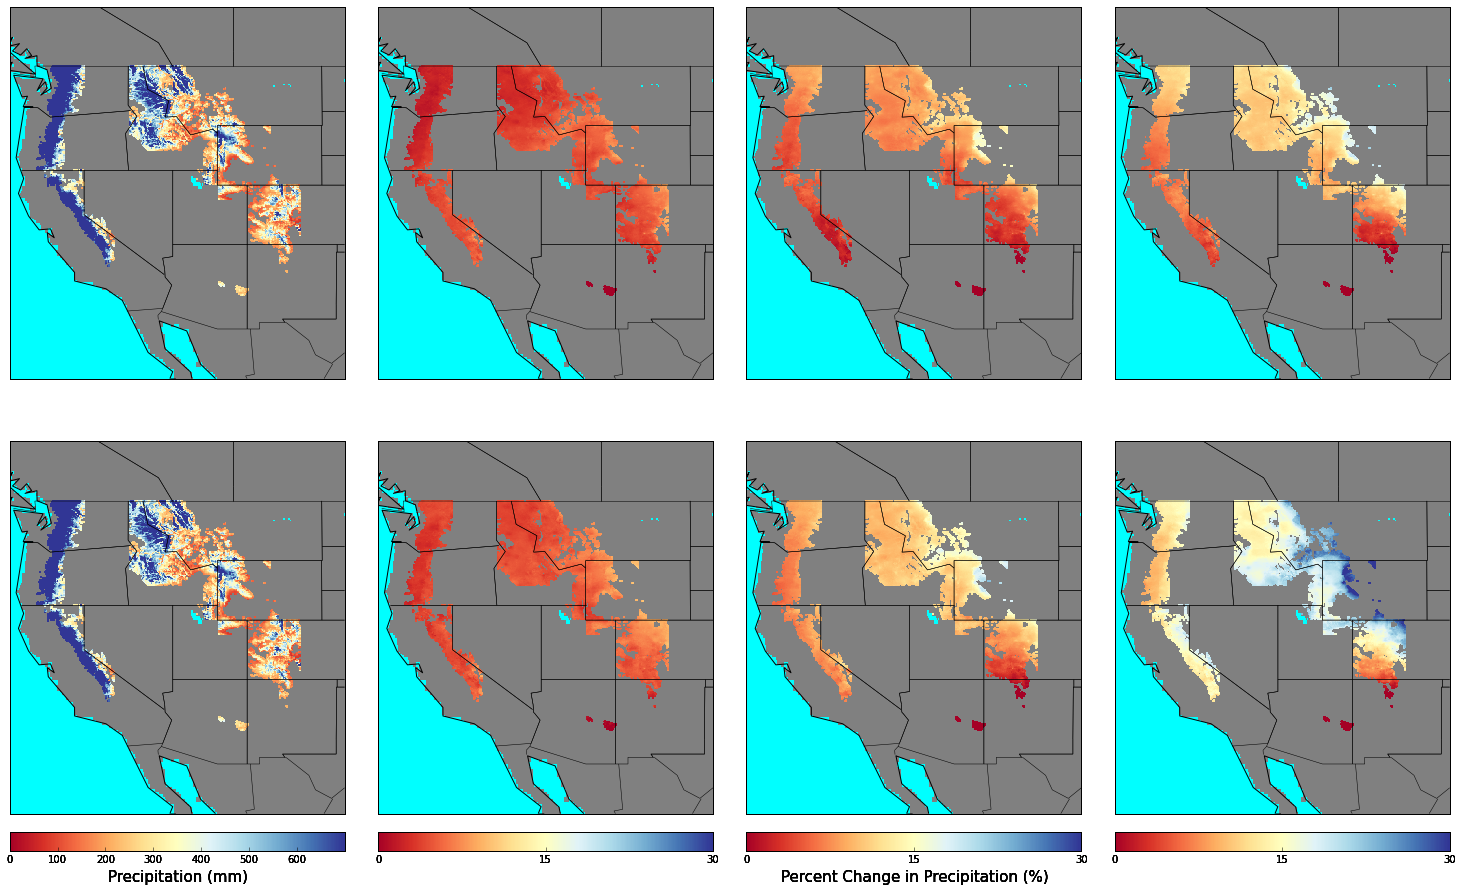

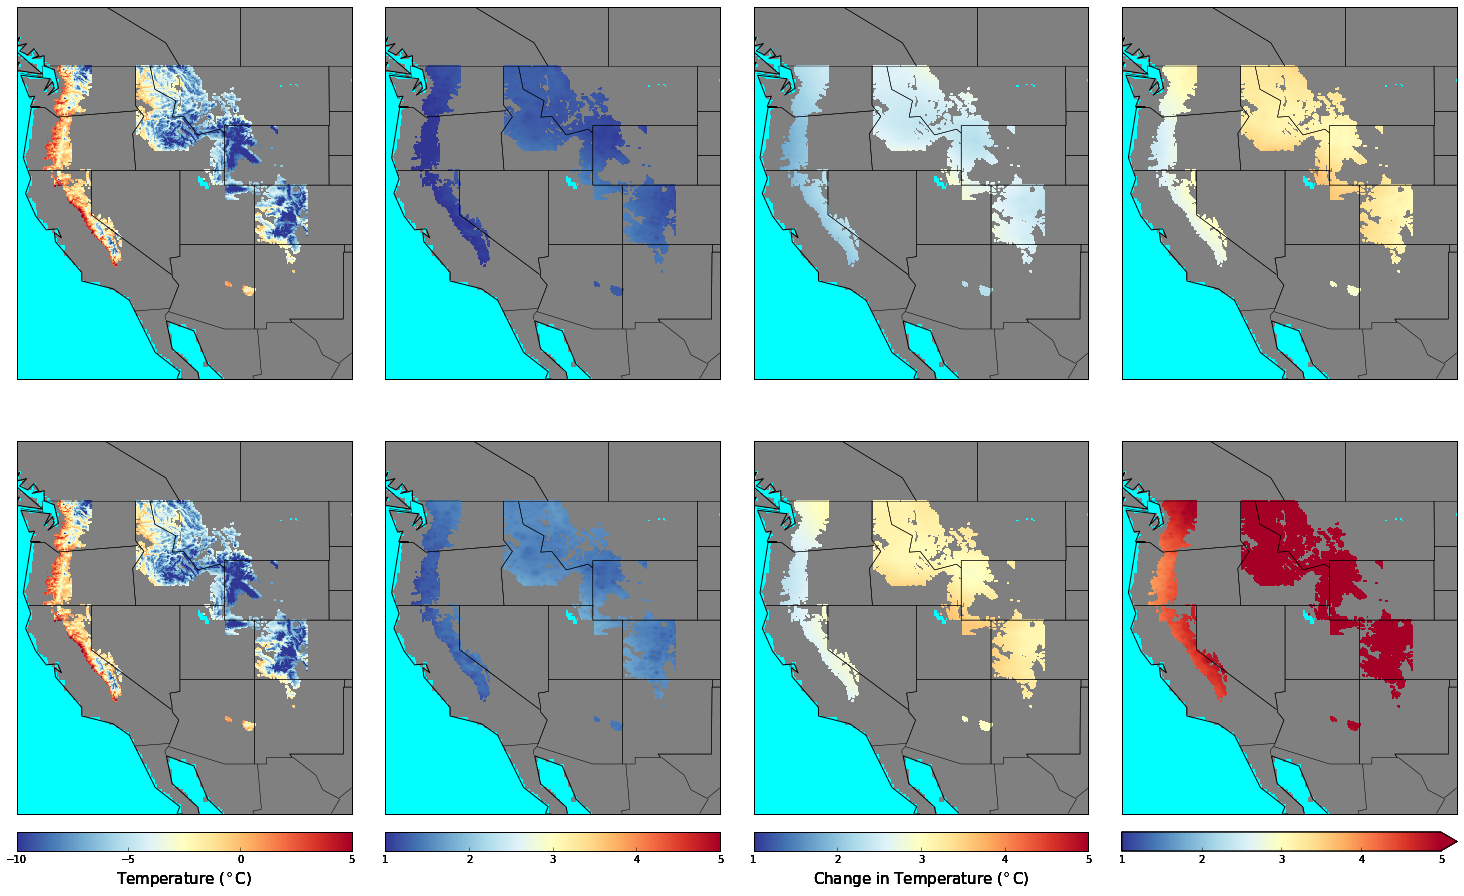

In [14]:
###################################################### MAKE FIGURE ###############################################################
## (10,7)
from pylab import *
lt = 20
rt = 14
for variable in variables: 
    fig = plt.figure(figsize=(lt,rt))
    for num in np.arange(len(chunks)):
        ax = fig.add_subplot(2,4,num+1)
        m = make_map()
        for basin in basins: 
            if (scenarios[num] == "historical"):
                ## get data 
                direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
                filename = '%s_%s_%s_%s.npz' %(variable,basin,scenarios[num],chunks[num])
                data = np.load(os.path.join(direc,filename))
                lats_inc = data['lats']
                lons_inc = data['lons']
                var_series = data['var']
                lons_mesh,lats_mesh,data_mesh = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),
                                                             var_series.reshape(len(lats_inc),1)) 
                if (variable == "pr"):
                    cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='RdYlBu',latlon=True,zorder=1,vmin=0,vmax=700)
                else: 
                    cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='RdYlBu_r',latlon=True,zorder=1,vmin=-10,vmax=5)
            else: 
                ## get data 
                direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
                filename = '%s_%s_%s_%s.npz' %(variable,basin,scenarios[num],chunks[num])
                data = np.load(os.path.join(direc,filename))
                lats_inc = data['lats']
                lons_inc = data['lons']
                var_series = data['var']
                lons_mesh,lats_mesh,data_mesh = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),
                                                             var_series.reshape(len(lats_inc),1)) 
                if (variable == "pr") and (basin == "california"):
                    data_mesh = np.divide(np.subtract(data_mesh,pr_california),pr_california)*100
                elif (variable == "pr") and (basin == "cascades"):
                    data_mesh = np.divide(np.subtract(data_mesh,pr_cascades),pr_cascades)*100
                elif (variable == "pr") and (basin == "northernrockies"):
                    data_mesh = np.divide(np.subtract(data_mesh,pr_northernrockies),pr_northernrockies)*100
                elif (variable == "pr") and (basin == "southernrockies"):
                    data_mesh = np.divide(np.subtract(data_mesh,pr_southernrockies),pr_southernrockies)*100
                elif (variable == "pr") and (basin == "whites"): 
                    data_mesh = np.divide(np.subtract(data_mesh,pr_whites),pr_whites)*100
                elif (variable == "temp") and (basin == "california"):
                    data_mesh = np.subtract(data_mesh,temp_california)
                elif (variable == "temp") and (basin == "cascades"):
                    data_mesh = np.subtract(data_mesh,temp_cascades)
                elif (variable == "temp") and (basin == "northernrockies"):
                    data_mesh = np.subtract(data_mesh,temp_northernrockies)
                elif (variable == "temp") and (basin == "southernrockies"):
                    data_mesh = np.subtract(data_mesh,temp_southernrockies)
                else: 
                    data_mesh = np.subtract(data_mesh,temp_whites)
                if (variable == "pr"):
                    cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='RdYlBu',latlon=True,zorder=1,vmin=0,vmax=30)
                else: 
                    cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='RdYlBu_r',latlon=True,zorder=1,vmin=1,vmax=5)
            if num >= 4 and num < 7:
                cbar = m.colorbar(cs, location='bottom',pad="5%")
                if (scenarios[num] == "historical") and (variable == "pr"):
                    cbar.set_ticks([0,100,200,300,400,500,600])
                    cbar.set_label('Precipitation (mm)',size=15)
                elif (scenarios[num] == "historical") and (variable == "temp"):
                    cbar.set_ticks([-10,-5,0,5])
                    cbar.set_label('Temperature ($^\circ$C)',size=15)
                elif(scenarios[num] != "historical") and (variable == "pr"): 
                    cbar.set_ticks([-30,-15,0,15,30])
                else: 
                    cbar.set_ticks([1,2,3,4,5])
            elif num == 7 and (variable == "temp"):
                cbar = m.colorbar(cs, location='bottom',pad="5%",extend='max')
                if (scenarios[num] == "historical") and (variable == "pr"):
                    cbar.set_ticks([0,100,200,300,400,500,600])
                if (scenarios[num] == "historical") and (variable == "temp"):
                    cbar.set_ticks([-10,-5,0,5])
                elif(scenarios[num] != "historical") and (variable == "pr"): 
                    cbar.set_ticks([-30,-15,0,15,30])
                else: 
                    cbar.set_ticks([1,2,3,4,5])
            if num == 6 and (variable == "temp"):
                cbar.set_label('Change in Temperature ($^\circ$C)',size=15)
            elif num == 6 and (variable == "pr"):
                cbar.set_label('Percent Change in Precipitation (%)',size=15)
            if num == 7 and (variable == "pr"):
                cbar = m.colorbar(cs, location='bottom',pad="5%")
                cbar.set_ticks([-30,-15,0,15,30])
    fig.subplots_adjust(left=0,right=1,top=1,bottom=0.1,hspace=0.00000001,wspace=0.1)
    ## save figure
    direc = '/raid9/gergel/agg_snowpack/climatology/plots'
    plotname = '%s' %variable 
    savepath = os.path.join(direc,plotname)
    print("saving figure to %s" %savepath)
    plt.savefig(savepath)


saving figure to /raid9/gergel/agg_snowpack/climatology/plots/pr
saving figure to /raid9/gergel/agg_snowpack/climatology/plots/temp


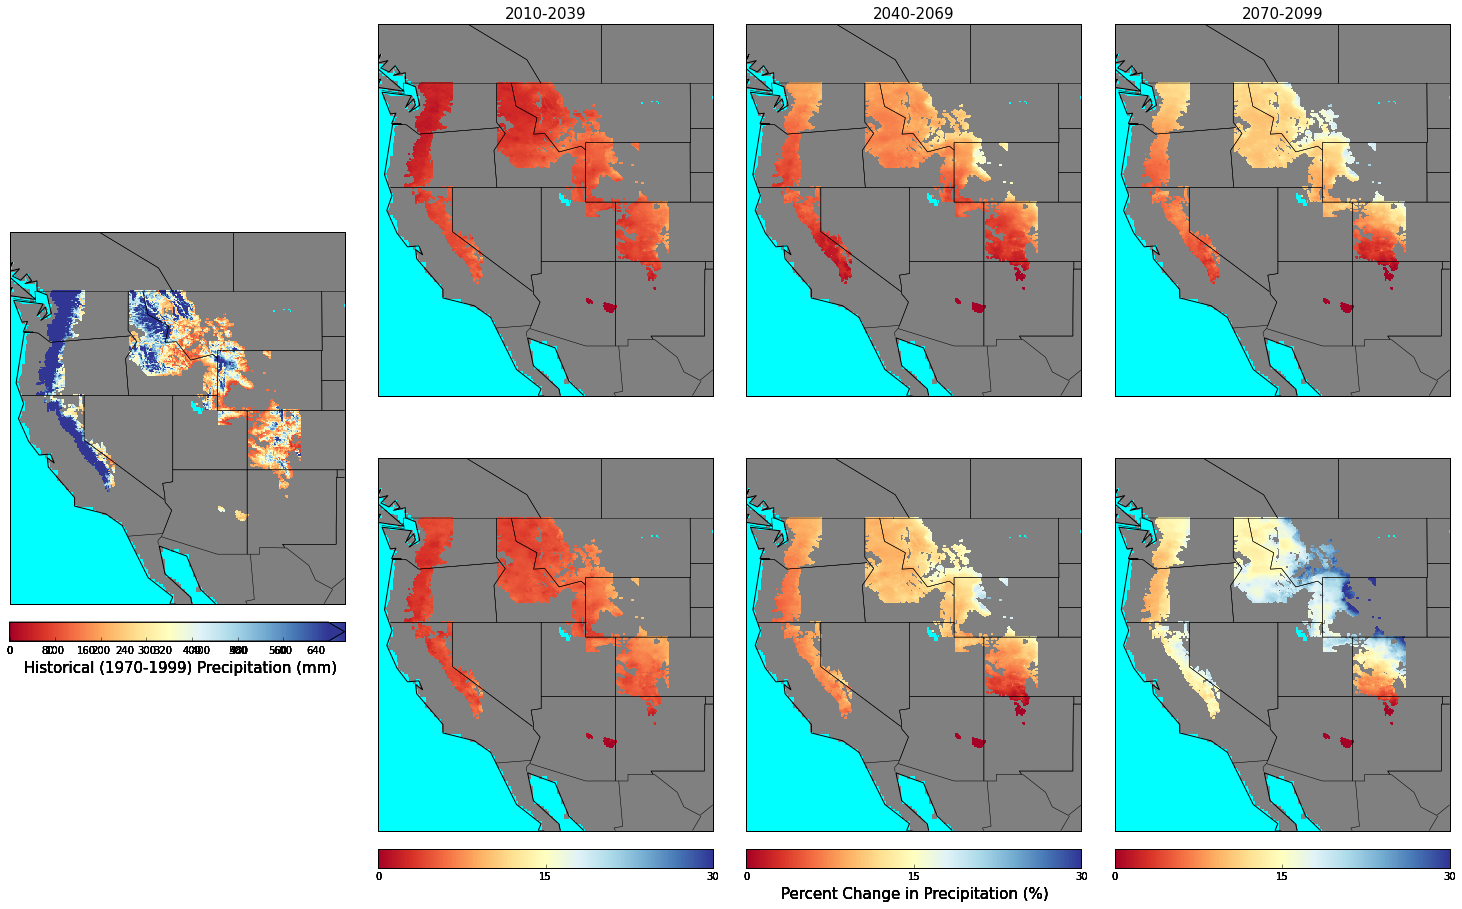

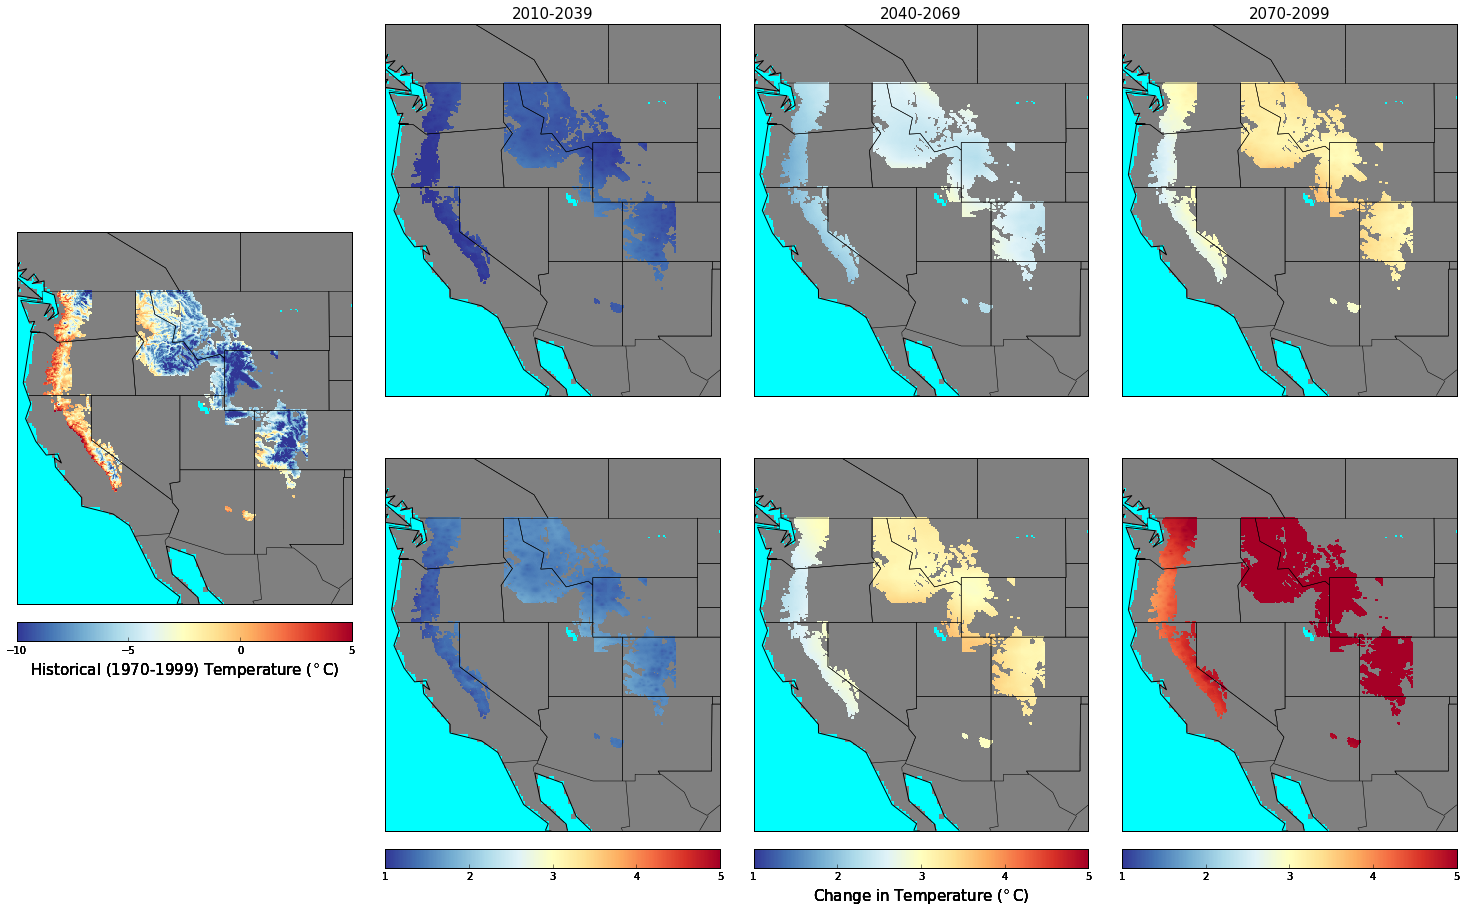

In [15]:
###################################################### MAKE FIGURE ###############################################################
## (10,7)
from pylab import *
%matplotlib inline
from snowpack_functions import make_map
lt = 20
rt = 14
variables = ["pr","temp"]
# chunks = ["1970-1999","2010-2039","2040-2069","2070-2099","1970-1999","2010-2039","2040-2069","2070-2099"] 
chunks = ["2010-2039","2040-2069","2070-2099","2010-2039","2040-2069","2070-2099","1970-1999"] 
# scenarios = ["historical","rcp45","rcp45","rcp45","historical","rcp85","rcp85","rcp85"] 
scenarios = ["rcp45","rcp45","rcp45","rcp85","rcp85","rcp85","historical"] 
basins = ["california","cascades","northernrockies","southernrockies","whites"] 
sps = np.asarray([2,3,4,6,7,8,9])
for variable in variables: 
    fig = plt.figure(figsize=(lt,rt))
    for num in np.arange(len(chunks)):
        if sps[num] < 9: 
            ax = fig.add_subplot(2,4,sps[num])
        else: 
            ax = fig.add_subplot(1,4,1)
        m = make_map()
        if sps[num] < 6:
            ax.set_title(chunks[num],fontsize=15)
        for basin in basins: 
            if (scenarios[num] == "historical"):
                ## get data 
                direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
                filename = '%s_%s_%s_%s.npz' %(variable,basin,scenarios[num],chunks[num])
                data = np.load(os.path.join(direc,filename))
                lats_inc = data['lats']
                lons_inc = data['lons']
                var_series = data['var']
                lons_mesh,lats_mesh,data_mesh = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),
                                                             var_series.reshape(len(lats_inc),1)) 
                if (variable == "pr"):
                    cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='RdYlBu',latlon=True,zorder=1,vmin=0,vmax=700)
                else: 
                    cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='RdYlBu_r',latlon=True,zorder=1,vmin=-10,vmax=5)
            else: 
                ## get data 
                direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
                filename = '%s_%s_%s_%s.npz' %(variable,basin,scenarios[num],chunks[num])
                data = np.load(os.path.join(direc,filename))
                lats_inc = data['lats']
                lons_inc = data['lons']
                var_series = data['var']
                lons_mesh,lats_mesh,data_mesh = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),
                                                             var_series.reshape(len(lats_inc),1)) 
                if (variable == "pr") and (basin == "california"):
                    data_mesh = np.divide(np.subtract(data_mesh,pr_california),pr_california)*100
                elif (variable == "pr") and (basin == "cascades"):
                    data_mesh = np.divide(np.subtract(data_mesh,pr_cascades),pr_cascades)*100
                elif (variable == "pr") and (basin == "northernrockies"):
                    data_mesh = np.divide(np.subtract(data_mesh,pr_northernrockies),pr_northernrockies)*100
                elif (variable == "pr") and (basin == "southernrockies"):
                    data_mesh = np.divide(np.subtract(data_mesh,pr_southernrockies),pr_southernrockies)*100
                elif (variable == "pr") and (basin == "whites"): 
                    data_mesh = np.divide(np.subtract(data_mesh,pr_whites),pr_whites)*100
                elif (variable == "temp") and (basin == "california"):
                    data_mesh = np.subtract(data_mesh,temp_california)
                elif (variable == "temp") and (basin == "cascades"):
                    data_mesh = np.subtract(data_mesh,temp_cascades)
                elif (variable == "temp") and (basin == "northernrockies"):
                    data_mesh = np.subtract(data_mesh,temp_northernrockies)
                elif (variable == "temp") and (basin == "southernrockies"):
                    data_mesh = np.subtract(data_mesh,temp_southernrockies)
                else: 
                    data_mesh = np.subtract(data_mesh,temp_whites)
                if (variable == "pr"):
                    cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='RdYlBu',latlon=True,zorder=1,vmin=0,vmax=30)
                else: 
                    cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='RdYlBu_r',latlon=True,zorder=1,vmin=1,vmax=5)
            if num >= 3 and num < 7:
                cbar = m.colorbar(cs, location='bottom',pad="5%")
                if (scenarios[num] == "historical") and (variable == "pr"):
                    cbar = m.colorbar(cs, location='bottom',pad="5%")
                    cbar.set_ticks([0,100,200,300,400,500,600])
                    cbar.set_label(' Historical (1970-1999) Precipitation (mm)',size=15)
                elif (scenarios[num] == "historical") and (variable == "temp"):
                    cbar.set_ticks([-10,-5,0,5])
                    cbar.set_label('Historical (1970-1999) Temperature ($^\circ$C)',size=15)
                elif(scenarios[num] != "historical") and (variable == "pr"): 
                    cbar.set_ticks([-30,-15,0,15,30])
                else: 
                    cbar.set_ticks([1,2,3,4,5])
            elif num == 5 and (variable == "temp"):
                cbar = m.colorbar(cs, location='bottom',pad="5%",extend='max')
                if (scenarios[num] == "historical") and (variable == "pr"):
                    cbar.set_ticks([0,100,200,300,400,500,600])
                if (scenarios[num] == "historical") and (variable == "temp"):
                    cbar.set_ticks([-10,-5,0,5])
                elif(scenarios[num] != "historical") and (variable == "pr"): 
                    cbar.set_ticks([-30,-15,0,15,30])
                else: 
                    cbar.set_ticks([1,2,3,4,5])
            if num == 4 and (variable == "temp"):
                cbar.set_label('Change in Temperature ($^\circ$C)',size=15)
            elif num == 4 and (variable == "pr"):
                cbar.set_label('Percent Change in Precipitation (%)',size=15)
            if num == 7 and (variable == "pr"):
                cbar = m.colorbar(cs, location='bottom',pad="5%")
                cbar.set_ticks([-30,-15,0,15,30])
    fig.subplots_adjust(left=0,right=1,top=1,bottom=0.1,hspace=0.00000001,wspace=0.1)
    ## save figure
    direc = '/raid9/gergel/agg_snowpack/climatology/plots'
    plotname = '%s' %variable 
    savepath = os.path.join(direc,plotname)
    print("saving figure to %s" %savepath)
    plt.savefig(savepath)